In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u
import numpy as np
import time
import matplotlib.pyplot as plt

In [16]:
mh = '+0.0'
CtoO = '1.0'


filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso-dev/reference/opacities/ck_cx_cont_opacities.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/sonora_2020_feh+000_co_100.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)


In [17]:
T_eff= 700
grav = 316
nlevel = 91

## Brown Dwarf 
T_star = "NA"
semi_major = "NA" # AU
self_consistent_kzz= True # Only needed if you want to do on-the-fly calculation with MLT Kzz
##


# Lets use Kzz = 1d4 in cgs

In [27]:
cl_run = jdi.inputs(calculation="brown", climate = True)

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
cl_run.T_eff(Teff=T_eff)




#pressure=np.logspace(np.log10(1.77000392e-04),np.log10(80.0),nlevel) # set your pressure grid
temp_guess = np.zeros(shape=(nlevel))
kz = np.zeros(shape =(nlevel))

## load a bobcat model
pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(700)+"g316"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
pressure=pressure_dummy
for i in range(len(temp_guess)):
    temp_guess[i] = temp_guess[i] # perturb the profile
    kz[i] = 1e8 #0
    
nofczns = 1
nstr = np.array([0,55,89,0,0,0]) # initial guess of convective zones
rfacv = 0.0
rfaci =1.0
cloudy = False # not cloudy
fsed = 0.0

In [28]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed)


In [29]:
t0 = time.time()
pressure , temp, dtdp, nstr_new, flux_plus_final,quench_levels, df, all_profiles, all_kzz,dummy,dummy1,dummy2 = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz = True,diseq_chem = True, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False)
t1 = time.time()

Iteration number  0 , min , max temp  226.50562860231935 2928.6827127116903 , flux balance  0.08329395026017651
Iteration number  1 , min , max temp  225.57877225381387 2901.7920204123 , flux balance  0.006781770544553007
Iteration number  2 , min , max temp  225.4807536685371 2899.4485687659694 , flux balance  0.0003615094362678942
Converged Solution in iterations  2
Big iteration is  225.4807536685371 0
Iteration number  0 , min , max temp  222.01407555335004 2886.490540185099 , flux balance  0.002624833485367909
Iteration number  1 , min , max temp  221.87469735149296 2885.60515536451 , flux balance  0.0001312633537924626
Converged Solution in iterations  1
Profile converged
Iteration number  0 , min , max temp  220.6802988045688 2883.8856646935637 , flux balance  0.00026639661054619977
Iteration number  1 , min , max temp  220.66190767607986 2883.7951144985923 , flux balance  1.3175964443784075e-05
Converged Solution in iterations  1
Big iteration is  220.66190767607986 0
Iteration

In [30]:
path = "/Users/sagnickmukherjee/Documents/research/geers/vhs1256b/"

filename= path+"tpfile/test_2changed_tp_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_1e8.dat"
np.savetxt(filename, np.transpose([pressure,temp]), header= str("nstr "+str(nstr_new)+" T_eff "+str(T_eff)+" grav "+ str(grav)+" kz "+str(kz[0])+" T_star "+str(T_star)+" semi-major[AU] "+str(semi_major)))        

csv = path+"profile/test_2changed_profile_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_1e8.dat"
df.to_csv(csv,sep='\t')

hist = path+"hist/test_2changed_hist_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_1e8.dat"
np.savetxt(hist, all_profiles)

hist = path+"hist/test_2changed_hist_kz_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_1e8.dat"
np.savetxt(hist, all_kzz)

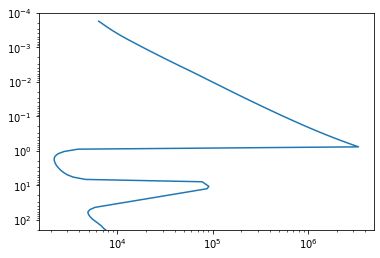

In [31]:
plt.ylim(200,1e-4)
plt.loglog(all_kzz[-91:],pressure)

In [3]:
kzz=np.array([1e3,1e5,1e7,1e8,1e9,1e10,1e12])
for iii in range(len(kzz)):
    T_eff= 1000
    grav = 16
    nlevel = 91

    ## Brown Dwarf 
    T_star = "NA"
    semi_major = "NA" # AU
    self_consistent_kzz= False # Only needed if you want to do on-the-fly calculation with MLT Kzz
    cl_run = jdi.inputs(calculation="brown", climate = True)

    cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
    cl_run.T_eff(Teff=T_eff)




    #pressure=np.logspace(np.log10(1.77000392e-04),np.log10(80.0),nlevel) # set your pressure grid
    temp_guess = np.zeros(shape=(nlevel))
    kz = np.zeros(shape =(nlevel))

    ## load a bobcat model
    pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(1000)+"g17"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
    pressure=pressure_dummy
    for i in range(len(temp_guess)):
        temp_guess[i] = temp_guess[i] # perturb the profile
        kz[i] = kzz[iii] #0

    nofczns = 1
    nstr = np.array([0,70,89,0,0,0]) # initial guess of convective zones
    rfacv = 0.0
    rfaci =1.0
    cloudy = False # not cloudy
    fsed = 0.0
        ##
    cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed)
    pressure , temp, dtdp, nstr_new, flux_plus_final,quench_levels, df, all_profiles, all_kzz = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz = True,diseq_chem = True, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False)
    
    
    path = "/Users/sagnickmukherjee/Documents/research/geers/vhs1256b/"

    filename= path+"tpfile/tp_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_1e"+str(int(np.log10(kzz[iii])))+".dat"
    np.savetxt(filename, np.transpose([pressure,temp]), header= str("nstr "+str(nstr_new)+" T_eff "+str(T_eff)+" grav "+ str(grav)+" kz "+str(kz[0])+" T_star "+str(T_star)+" semi-major[AU] "+str(semi_major)))        

    csv = path+"profile/profile_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_1e"+str(int(np.log10(kzz[iii])))+".dat"
    df.to_csv(csv,sep='\t')

    hist = path+"hist/hist_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_1e"+str(int(np.log10(kzz[iii])))+".dat"
    np.savetxt(hist, all_profiles)

    hist = path+"hist/hist_kz_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_1e"+str(int(np.log10(kzz[iii])))+".dat"
    np.savetxt(hist, all_kzz)

Iteration number  0 , min , max temp  493.1183591961965 2822.275702953303 , flux balance  0.0009728544279814685
Iteration number  1 , min , max temp  492.9965602672259 2821.9397684891806 , flux balance  1.06082080284303e-05
Converged Solution in iterations  1
Big iteration is  492.9965602672259 0
Iteration number  0 , min , max temp  498.6380289716308 2826.8998574056095 , flux balance  -1.8558549504713126e-05
Iteration number  1 , min , max temp  498.5414117932139 2826.927867474157 , flux balance  -7.378426323363993e-07
Converged Solution in iterations  1
Profile converged
Iteration number  0 , min , max temp  501.0127206800958 2828.515800543552 , flux balance  -3.058821035036683e-05
Iteration number  1 , min , max temp  500.994862715656 2828.5309109737373 , flux balance  -3.9413434640420845e-07
Converged Solution in iterations  1
Big iteration is  500.994862715656 0
Iteration number  0 , min , max temp  501.41011311491224 2829.0106138364536 , flux balance  -1.0988198179065354e-05
Conv

Iteration number  1 , min , max temp  444.94534398321167 2809.9997983098806 , flux balance  1.1058648974967777e-06
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [58 49 62 57]
Profile converged
[ 0 56 58 58 70 89]
Iteration number  0 , min , max temp  447.2500115143024 2812.9078681559727 , flux balance  0.0007186176900948858
Iteration number  1 , min , max temp  447.2448188116628 2812.9357587551604 , flux balance  1.3366054000862398e-07
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [58 49 61 56]
Big iteration is  447.2448188116628 0
Iteration number  0 , min , max temp  444.98553548689057 2809.7263126960415 , flux balance  0.0008419173278976114
Iteration number  1 , min , max temp  444.9639215196464 2809.6784468133537 , flux balance  2.125573815143369e-06
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [58 49 62 57]
Big iteration is  444.9639215196464 1
Iteration number  0 , min , max temp  446.96480597077624

Big iteration is  501.5402403589047 0
Iteration number  0 , min , max temp  501.50575493783055 2829.105249043418 , flux balance  -1.348555531106123e-06
Converged Solution in iterations  0
Profile converged
YAY ! ENDING WITH CONVERGENCE
1 conv Zone, so making small adjustment
New NSTR status is  [ 0 74 89  0  0  0]
Quench Levels are CO, CO2, NH3, HCN  [60 45 65 58]
661
DOING DISEQ CALCULATIONS NOW
Iteration number  0 , min , max temp  482.10287761349 2836.4083977034275 , flux balance  0.3202446672982489
Iteration number  1 , min , max temp  437.42077540336976 2850.567489361538 , flux balance  0.04082857329358622
Iteration number  2 , min , max temp  430.66647114019685 2850.4728917440966 , flux balance  0.0014602428001137106
Iteration number  3 , min , max temp  430.5899075117679 2850.474848427651 , flux balance  3.3751337920416324e-06
Converged Solution in iterations  3
Quench Levels are CO, CO2, NH3, HCN  [63 53 66 61]
Big iteration is  430.5899075117679 0
Iteration number  0 , min , m

Profile converged
[ 0 57 63 63 70 89]
Iteration number  0 , min , max temp  422.92668136880724 2799.344258413296 , flux balance  0.00014588519435347735
Iteration number  1 , min , max temp  422.9328876213295 2799.345421155545 , flux balance  6.0107455395949e-07
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [63 54 66 62]
Big iteration is  422.9328876213295 0
Iteration number  0 , min , max temp  420.75448004617374 2796.976723198395 , flux balance  0.0003117338673719773
Iteration number  1 , min , max temp  420.7205536244286 2796.949658182658 , flux balance  2.4068537172722816e-06
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [63 54 66 62]
Profile converged
[ 0 57 64 64 70 89]
Iteration number  0 , min , max temp  422.2044099834242 2797.561213226994 , flux balance  5.83649689000865e-06
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [63 54 66 62]
Big iteration is  422.2044099834242 0
Iteration number  0 , min 

Iteration number  2 , min , max temp  406.24272396586986 2845.883105371665 , flux balance  0.003451166905546991
Iteration number  3 , min , max temp  405.4903569665561 2845.888855812778 , flux balance  1.688949966708462e-05
Converged Solution in iterations  3
Quench Levels are CO, CO2, NH3, HCN  [67 57 70 66]
Big iteration is  405.4903569665561 0
Iteration number  0 , min , max temp  392.12837158340744 2830.2824894129344 , flux balance  0.023605595770036
Iteration number  1 , min , max temp  389.77496262426075 2828.091906358566 , flux balance  0.00030803907983893404
Iteration number  2 , min , max temp  389.7575952172542 2828.082731831582 , flux balance  1.605850231658637e-07
Converged Solution in iterations  2
Quench Levels are CO, CO2, NH3, HCN  [68 59 70 67]
Big iteration is  389.7575952172542 1
Iteration number  0 , min , max temp  382.7551815648117 2811.8750306914685 , flux balance  0.0025083856293161566
Iteration number  1 , min , max temp  382.5203834339385 2811.549842603153 , f

Big iteration is  396.00654903532484 0
Iteration number  0 , min , max temp  394.34907381841003 2737.9787975362633 , flux balance  0.0001821322212140988
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [68 59 70 67]
Profile converged
Iteration number  0 , min , max temp  397.03234702083336 2737.848369741161 , flux balance  -0.0012892875366038697
Iteration number  1 , min , max temp  397.14283258328913 2738.2114981474724 , flux balance  -5.04488555673185e-05
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [68 58 70 67]
Big iteration is  397.14283258328913 0
Iteration number  0 , min , max temp  395.4979597337731 2736.871316747405 , flux balance  0.00019478155794625795
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [68 58 70 67]
Profile converged
Iteration number  0 , min , max temp  397.98235544087214 2736.7977112289554 , flux balance  -0.0014704790109723199
Iteration number  1 , min , max temp  398.1020507968586

Profile converged
Iteration number  0 , min , max temp  369.95471583410637 2746.3067912584097 , flux balance  3.9087936568420434e-05
Iteration number  1 , min , max temp  369.96093739698586 2746.237876946891 , flux balance  1.1072006907695154e-06
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [70 61 72 69]
Big iteration is  369.96093739698586 0
Iteration number  0 , min , max temp  369.82890909562394 2748.8054500469866 , flux balance  -2.7670830303803513e-05
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [70 61 72 69]
Profile converged
Iteration number  0 , min , max temp  370.009990444968 2738.8128551148693 , flux balance  -6.389600361447833e-05
Iteration number  1 , min , max temp  370.0198130643929 2738.8103481401954 , flux balance  5.3033229008760974e-08
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [70 61 72 69]
Big iteration is  370.0198130643929 0
Iteration number  0 , min , max temp  369.819693449426

Big iteration is  386.8886285034342 0
Iteration number  0 , min , max temp  385.4013025020536 2707.211667486313 , flux balance  -2.1830272557426857e-05
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [70 60 72 69]
Profile converged
Iteration number  0 , min , max temp  387.05426918794416 2706.0615886936557 , flux balance  -0.0014178126080946327
Iteration number  1 , min , max temp  387.151234857007 2706.5014623422667 , flux balance  -7.038587183080937e-05
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [70 60 72 69]
Big iteration is  387.151234857007 0
Iteration number  0 , min , max temp  385.98254804087276 2706.680478269685 , flux balance  -2.759308596228465e-05
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [70 60 72 69]
Profile converged
Iteration number  0 , min , max temp  387.01919367972613 2705.8156744552225 , flux balance  -0.0011247900265997962
Converged Solution in iterations  0
Quench Levels are CO,

Big iteration is  357.829856387885 0
Iteration number  0 , min , max temp  356.50651770826335 2713.239892990568 , flux balance  -8.33721219317511e-05
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [72 63 74 71]
Profile converged
Iteration number  0 , min , max temp  359.8908237545827 2706.701443374526 , flux balance  -0.00015210912349422314
Iteration number  1 , min , max temp  359.8743551083155 2706.7153240285593 , flux balance  -7.279887637727896e-07
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [72 63 74 71]
Big iteration is  359.8743551083155 0
Iteration number  0 , min , max temp  358.4870819283721 2708.9835051380014 , flux balance  -0.0001003959214094897
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [72 63 74 71]
Profile converged
Iteration number  0 , min , max temp  361.9297563829272 2702.8753022382375 , flux balance  -0.0002517346823653895
Iteration number  1 , min , max temp  361.9226760583636 270

Profile converged
Iteration number  0 , min , max temp  374.98275843755346 2684.4812809330906 , flux balance  -0.0005951684845275739
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [72 62 74 71]
Big iteration is  374.98275843755346 0
Iteration number  0 , min , max temp  374.6199172163366 2685.1442922628653 , flux balance  -0.00011370168917197445
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [72 62 74 71]
Profile converged
final [ 0 55 89  0  0  0]
Iteration number  0 , min , max temp  374.4997400474315 2685.2661171545187 , flux balance  -2.112643904700758e-05
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [72 62 74 71]
Big iteration is  374.4997400474315 0
Iteration number  0 , min , max temp  374.47091069315456 2685.2874370250406 , flux balance  -3.704245935166774e-06
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [72 62 74 71]
Profile converged
YAY ! ENDING WITH CONVERGENCE
Iterat

Big iteration is  346.3416313769197 0
Iteration number  0 , min , max temp  344.5548661802604 2701.5391823759232 , flux balance  -0.0002112519442204465
Iteration number  1 , min , max temp  344.55355010227055 2701.6124826258038 , flux balance  -4.232130387450079e-06
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [74 64 76 74]
Profile converged
Iteration number  0 , min , max temp  348.8958225646115 2691.5767291208863 , flux balance  -0.0003655866481418844
Iteration number  1 , min , max temp  348.864865113314 2691.6460070860803 , flux balance  -4.851023230118711e-06
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [74 64 76 74]
Big iteration is  348.864865113314 0
Iteration number  0 , min , max temp  346.9611125556701 2696.381029960352 , flux balance  -0.00025762631031762696
Iteration number  1 , min , max temp  346.96081371443876 2696.4693403754945 , flux balance  -6.026467200987892e-06
Converged Solution in iterations  1
Quench Level

Profile converged
final [ 0 54 89  0  0  0]
Iteration number  0 , min , max temp  359.9801806554032 2676.2915660104345 , flux balance  -2.028710876604992e-05
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [74 64 76 74]
Big iteration is  359.9801806554032 0
Iteration number  0 , min , max temp  359.95360706426504 2676.3282617919676 , flux balance  -6.477113250428581e-06
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [74 64 76 74]
Profile converged
YAY ! ENDING WITH CONVERGENCE
Iteration number  0 , min , max temp  493.1183591961965 2822.275702953303 , flux balance  0.0009728544279814685
Iteration number  1 , min , max temp  492.9965602672259 2821.9397684891806 , flux balance  1.06082080284303e-05
Converged Solution in iterations  1
Big iteration is  492.9965602672259 0
Iteration number  0 , min , max temp  498.6380289716308 2826.8998574056095 , flux balance  -1.8558549504713126e-05
Iteration number  1 , min , max temp  498.541411793213

Big iteration is  322.55269314000594 0
Iteration number  0 , min , max temp  321.87407602082715 2701.413565857903 , flux balance  -0.00025949124958259893
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [79 67 81 79]
Profile converged
Iteration number  0 , min , max temp  324.63490026742056 2690.434007016475 , flux balance  -0.00020840382539345063
Iteration number  1 , min , max temp  324.6750675427186 2690.3979061594414 , flux balance  2.7138425897596784e-06
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [79 67 81 79]
Big iteration is  324.6750675427186 0
Iteration number  0 , min , max temp  323.94411457709055 2696.0739096294833 , flux balance  -0.00032010288270658296
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [79 67 81 79]
Profile converged
Iteration number  0 , min , max temp  326.55854342166094 2685.731605603334 , flux balance  -0.0003770219948743616
Iteration number  1 , min , max temp  326.6157932850

In [ ]:
pressure_bobcat,temp_bobcat = np.loadtxt("/Users/sagnickmukherjee/Documents/GitHub/Disequilibrium-Picaso/t"+str(1000)+"g1000"+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)

plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(205,1e-4)
plt.xlim(100,2000)

plt.semilogy(temp,pressure,color="r",linewidth=3,label="Our Run")


plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)



In [14]:
T_eff =1000
grav = 16
path = "/Users/sagnickmukherjee/Documents/research/geers/vhs1256b/"

filename= path+"tpfile/tp_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_moses_0pt1H.dat"
p,t= np.loadtxt(filename, usecols=[0,1],unpack=True)        

hist = path+"hist/hist_kz_deq_planet_"+str(T_eff)+"_grav_"+str(grav)+"_moses_0pt1H.dat"
tmix = np.loadtxt(hist,usecols=[0],unpack=True)
print(len(tmix))

8463


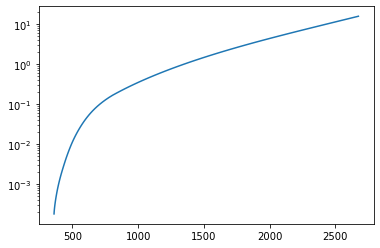

In [11]:
plt.semilogy(t,p)